In [302]:
from mnist import MNIST 
import numpy as np
from pylab import *
from matplotlib import colors
%matplotlib inline

mndata = MNIST('./data')

mndata.load_training()
img_side = 28
n_mnist_pixels = img_side*img_side

In [303]:
labels = mndata.train_labels

cluster_size = 10
train_inputs_idx = []
for idx in [0, 4]:
    label_idx = np.where(np.isin(labels,[idx]))[0][:cluster_size]
    train_inputs_idx.append(label_idx)

samples_idx = np.array(train_inputs_idx, dtype='int').flatten()
samples_idx.size

20

In [304]:
images = []
for sample_idx in samples_idx.flatten():
    images.append(mndata.train_images[sample_idx])

images = np.array(images, dtype='float')
images[images <= 127] = -1
images[images > 127] = 1
images.shape

(20, 784)

In [305]:
def simple_plot(T: list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)


    plt.show()

In [306]:
from typing import Literal

def show_image(image: ndarray, cmap: Literal['bone', 'Greys'] = 'bone'):
    # figure(figsize=(15, 10))

    imshow(np.array(image),
        interpolation='none',
        aspect='equal',
        cmap=cmap,
        )

    axis("off")

    show()

In [307]:
def show_images_table(images_2d: ndarray, img_side: int = 28, row_size=10):
    column_size = int(images.shape[0] / row_size)

    shaped_images = images_2d.reshape(column_size, row_size, img_side, img_side)
    shaped_images = shaped_images.swapaxes(1, 2).reshape(column_size*img_side, row_size*img_side)

    figure(figsize=(15, 10))

    imshow(shaped_images,
           interpolation='none',
           aspect='equal',
           cmap='bone',
           )
    
    axis("off")

# show_images_table(images_2d=images)
images.shape

(20, 784)

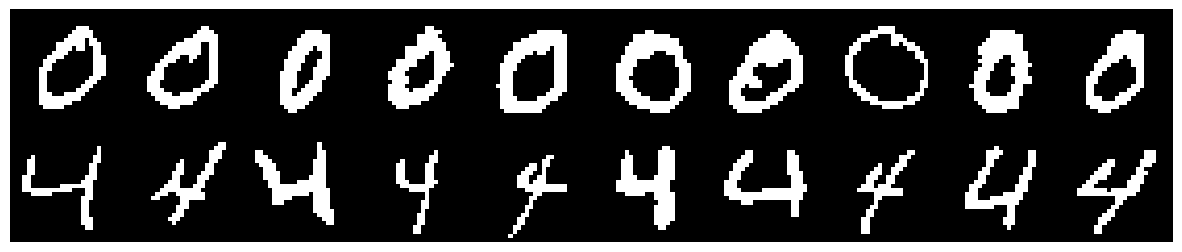

In [308]:
show_images_table(images_2d=images)

In [309]:
prec = 1e-30

I = np.zeros(n_mnist_pixels)
O = np.zeros(n_mnist_pixels)

W = np.random.rand(O.size, I.size) * 0.01

TR = np.zeros(n_mnist_pixels)
PO = np.zeros(n_mnist_pixels)

D = np.zeros(I.shape)

print(f'{W.max()=} {W.min()=} {np.mean(W)=}')
print(f'{TR.max()=} {TR.min()=} {np.mean(TR)=}')

# train
epoch_cnt = 100

n = 9

eps0 = 0.01
eps0_TR = 0.005

push_delta = 0.04

train_images_idx = [10, 0]
# train_images_idx = [0, 1, 2, 3, 4, 10, 11, 12, 13, 14]

for epoch_idx in range(epoch_cnt):
    eps = (epoch_cnt - epoch_idx) * eps0
    eps_TR = (epoch_cnt - epoch_idx) * eps0_TR

    for img_idx in train_images_idx:
        I = np.copy(images[img_idx])

        O = np.dot(W, I)  # I[np.newaxis].T ?

        sgn_O = np.sign(O)
        O = O**n

        O /= np.max(np.abs(O)) + prec

        # winner
        winners_idx = np.where(I > 0)
        loosers_idx = np.where(I <= 0)

        # threshold update
        TR[winners_idx] += (O[winners_idx] - PO[winners_idx] * TR[winners_idx]) * eps_TR

        PO[winners_idx] = O[winners_idx]

        # W update
        D.fill(0)
        D[winners_idx] = 1
        D[loosers_idx] = -push_delta

        W += (I - W * O[np.newaxis].T) * D[np.newaxis].T * eps


print(f'{W.max()=} {W.min()=} {np.mean(W)=} {np.median(W)=}')
print(f'{TR.max()=} {TR.min()=} {np.mean(TR)=} {np.median(TR)=}')


W.max()=0.009999985306558282 W.min()=8.48527527574916e-09 np.mean(W)=0.005002171020048171
TR.max()=0.0 TR.min()=0.0 np.mean(TR)=0.0
W.max()=1.6988506468434237 W.min()=-1.695482447771564 np.mean(W)=0.7267309607490421 np.median(W)=1.6958787009583842
TR.max()=1.0052128098916806 TR.min()=0.0 np.mean(TR)=0.2379090246160216 np.median(TR)=0.0


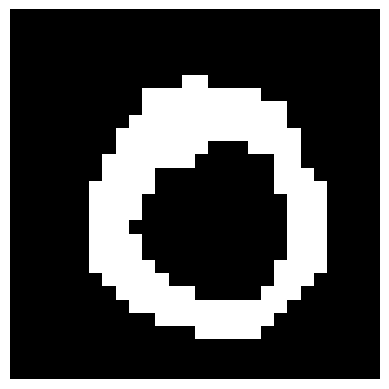

O.max()=6.852910712696607e+25 O.min()=-9.999733848967659e+25 np.mean(O)=-6.885516733852412e+25 np.median(O)=-9.992536335641098e+25 (O > 0).sum()=187
(O > 0).sum()=125


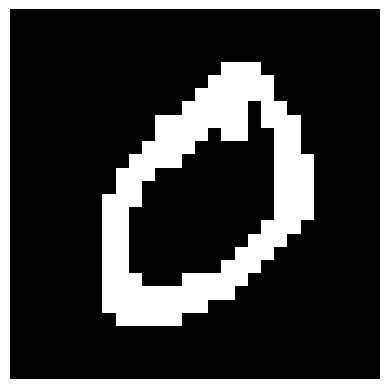

O.max()=1.1716504452091106e+27 O.min()=-1.499012387922633e+27 np.mean(O)=-9.567256779877868e+26 np.median(O)=-1.4984837045886677e+27 (O > 0).sum()=187
(O > 0).sum()=125


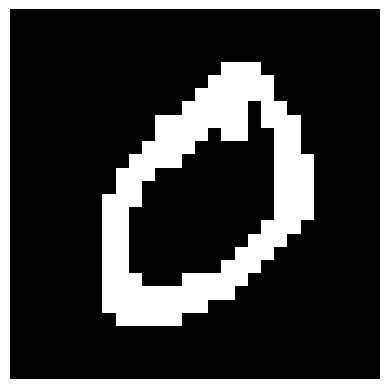

O.max()=1.1716504452091106e+27 O.min()=-1.499012387922633e+27 np.mean(O)=-9.567256779877868e+26 np.median(O)=-1.4984837045886677e+27 (O > 0).sum()=187
(O > 0).sum()=125


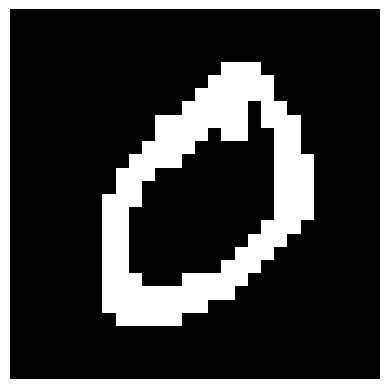

O.max()=1.1716504452091106e+27 O.min()=-1.499012387922633e+27 np.mean(O)=-9.567256779877868e+26 np.median(O)=-1.4984837045886677e+27 (O > 0).sum()=187
(O > 0).sum()=125


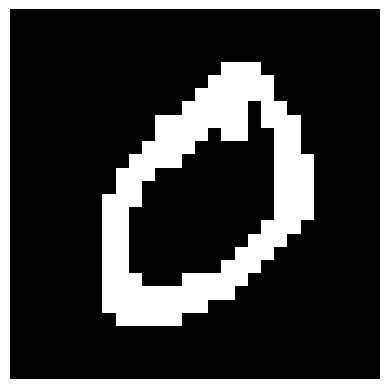

O.max()=1.1716504452091106e+27 O.min()=-1.499012387922633e+27 np.mean(O)=-9.567256779877868e+26 np.median(O)=-1.4984837045886677e+27 (O > 0).sum()=187
(O > 0).sum()=125


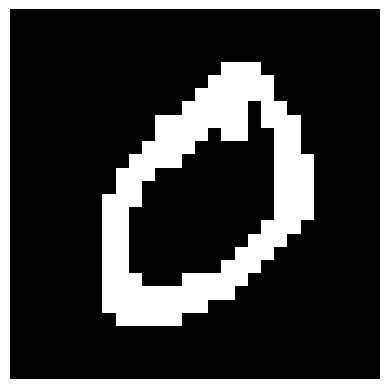

O.max()=1.1716504452091106e+27 O.min()=-1.499012387922633e+27 np.mean(O)=-9.567256779877868e+26 np.median(O)=-1.4984837045886677e+27 (O > 0).sum()=187
(O > 0).sum()=125


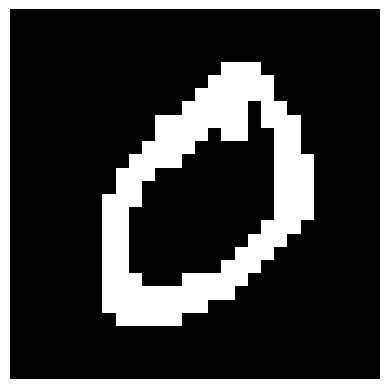

O.max()=1.1716504452091106e+27 O.min()=-1.499012387922633e+27 np.mean(O)=-9.567256779877868e+26 np.median(O)=-1.4984837045886677e+27 (O > 0).sum()=187
(O > 0).sum()=125


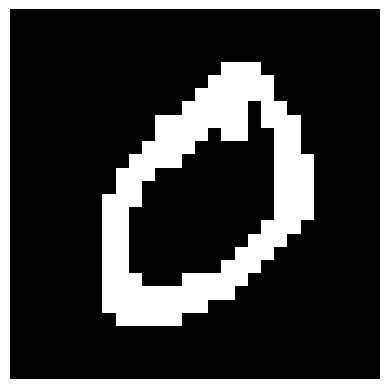

O.max()=1.1716504452091106e+27 O.min()=-1.499012387922633e+27 np.mean(O)=-9.567256779877868e+26 np.median(O)=-1.4984837045886677e+27 (O > 0).sum()=187
(O > 0).sum()=125


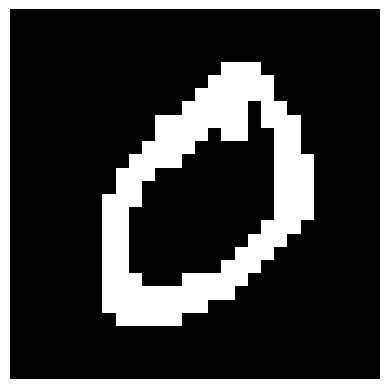

O.max()=1.1716504452091106e+27 O.min()=-1.499012387922633e+27 np.mean(O)=-9.567256779877868e+26 np.median(O)=-1.4984837045886677e+27 (O > 0).sum()=187
(O > 0).sum()=125


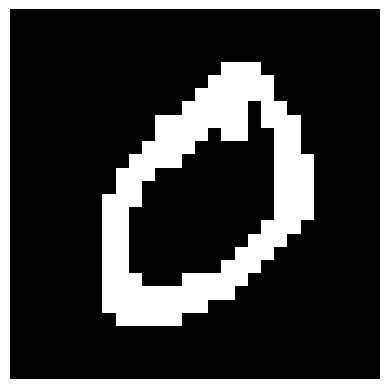

O.max()=1.1716504452091106e+27 O.min()=-1.499012387922633e+27 np.mean(O)=-9.567256779877868e+26 np.median(O)=-1.4984837045886677e+27 (O > 0).sum()=187
(O > 0).sum()=125


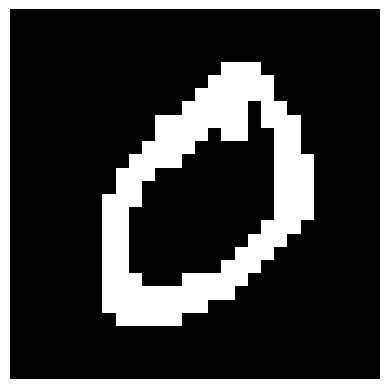

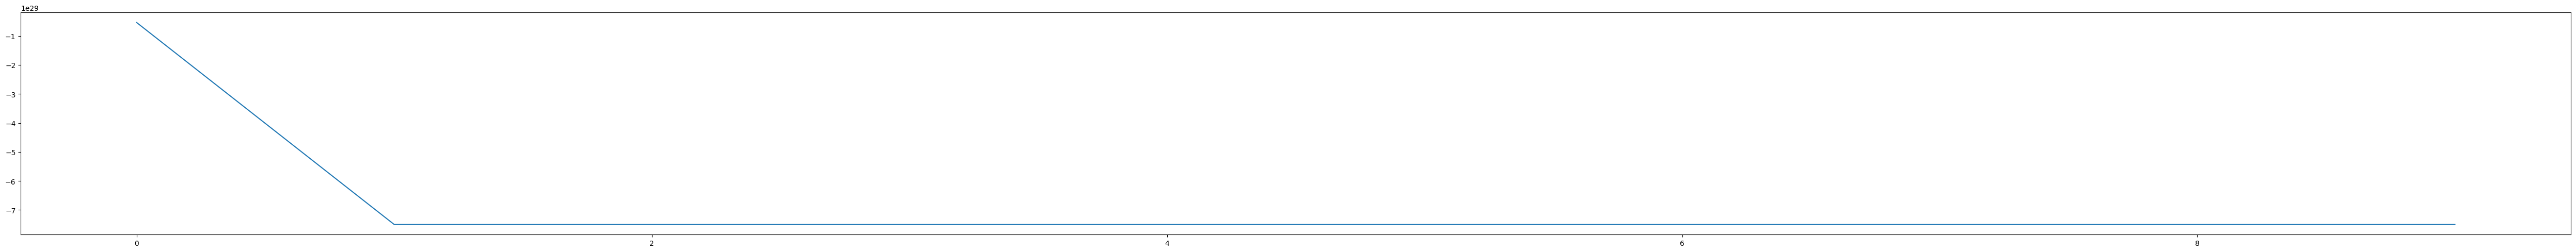

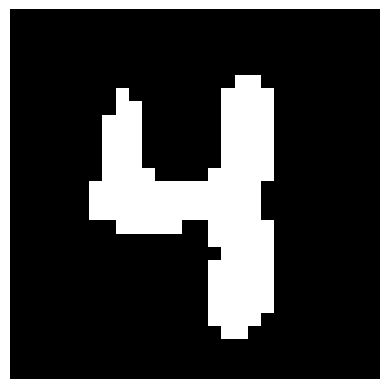

O.max()=9.449340922474017e+25 O.min()=-1.5192897037425836e+26 np.mean(O)=-1.1034010601775585e+26 np.median(O)=-1.5182970495695967e+26 (O > 0).sum()=187
(O > 0).sum()=81


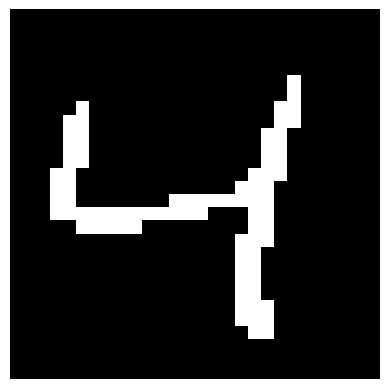

O.max()=1.1615982692428494e+27 O.min()=-1.4828237255329896e+27 np.mean(O)=-1.0151067121001017e+27 np.median(O)=-1.4821756871062832e+27 (O > 0).sum()=187
(O > 0).sum()=81


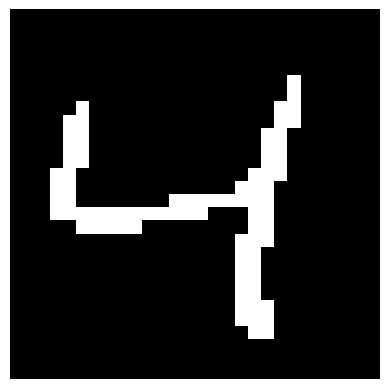

O.max()=1.1615982692428494e+27 O.min()=-1.4828237255329896e+27 np.mean(O)=-1.0151067121001017e+27 np.median(O)=-1.4821756871062832e+27 (O > 0).sum()=187
(O > 0).sum()=81


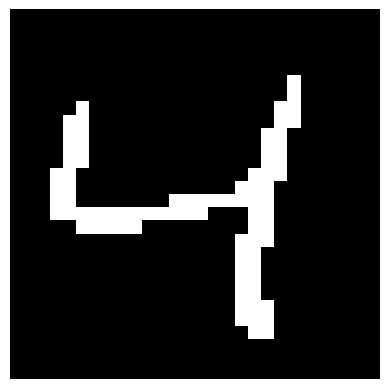

O.max()=1.1615982692428494e+27 O.min()=-1.4828237255329896e+27 np.mean(O)=-1.0151067121001017e+27 np.median(O)=-1.4821756871062832e+27 (O > 0).sum()=187
(O > 0).sum()=81


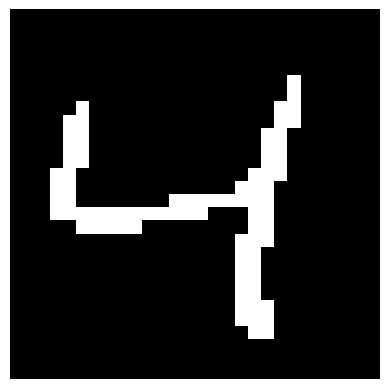

O.max()=1.1615982692428494e+27 O.min()=-1.4828237255329896e+27 np.mean(O)=-1.0151067121001017e+27 np.median(O)=-1.4821756871062832e+27 (O > 0).sum()=187
(O > 0).sum()=81


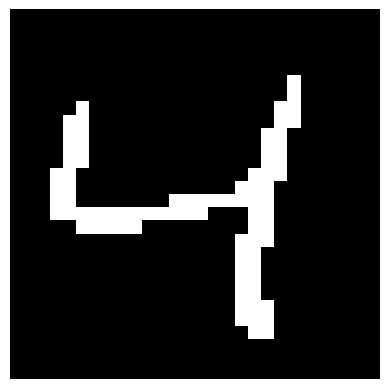

O.max()=1.1615982692428494e+27 O.min()=-1.4828237255329896e+27 np.mean(O)=-1.0151067121001017e+27 np.median(O)=-1.4821756871062832e+27 (O > 0).sum()=187
(O > 0).sum()=81


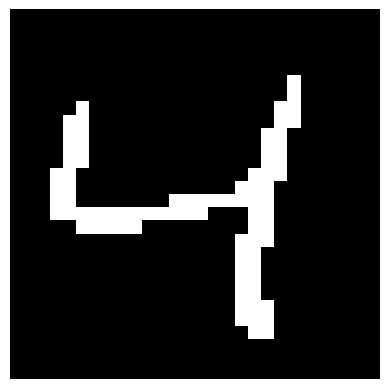

O.max()=1.1615982692428494e+27 O.min()=-1.4828237255329896e+27 np.mean(O)=-1.0151067121001017e+27 np.median(O)=-1.4821756871062832e+27 (O > 0).sum()=187
(O > 0).sum()=81


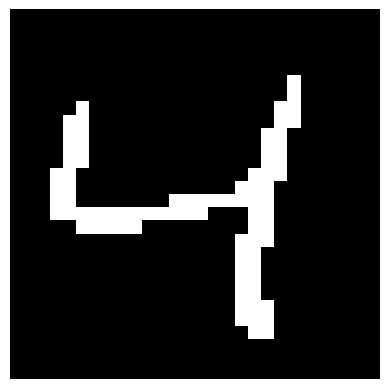

O.max()=1.1615982692428494e+27 O.min()=-1.4828237255329896e+27 np.mean(O)=-1.0151067121001017e+27 np.median(O)=-1.4821756871062832e+27 (O > 0).sum()=187
(O > 0).sum()=81


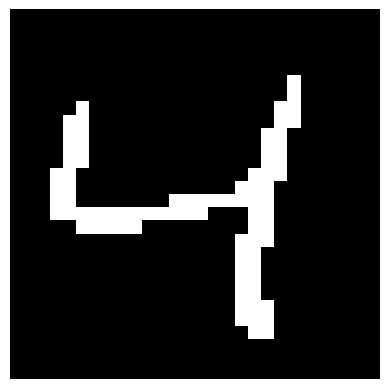

O.max()=1.1615982692428494e+27 O.min()=-1.4828237255329896e+27 np.mean(O)=-1.0151067121001017e+27 np.median(O)=-1.4821756871062832e+27 (O > 0).sum()=187
(O > 0).sum()=81


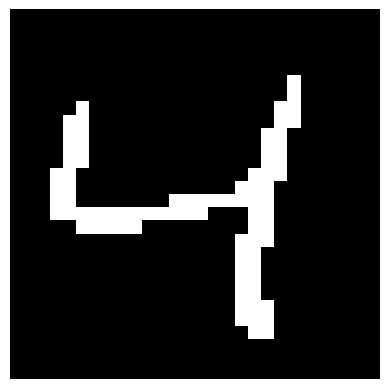

O.max()=1.1615982692428494e+27 O.min()=-1.4828237255329896e+27 np.mean(O)=-1.0151067121001017e+27 np.median(O)=-1.4821756871062832e+27 (O > 0).sum()=187
(O > 0).sum()=81


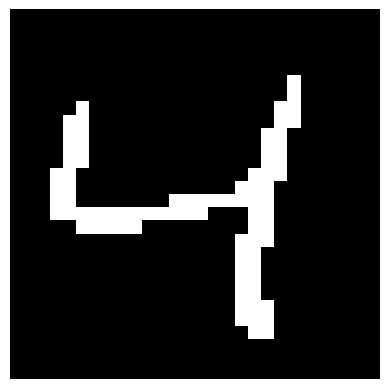

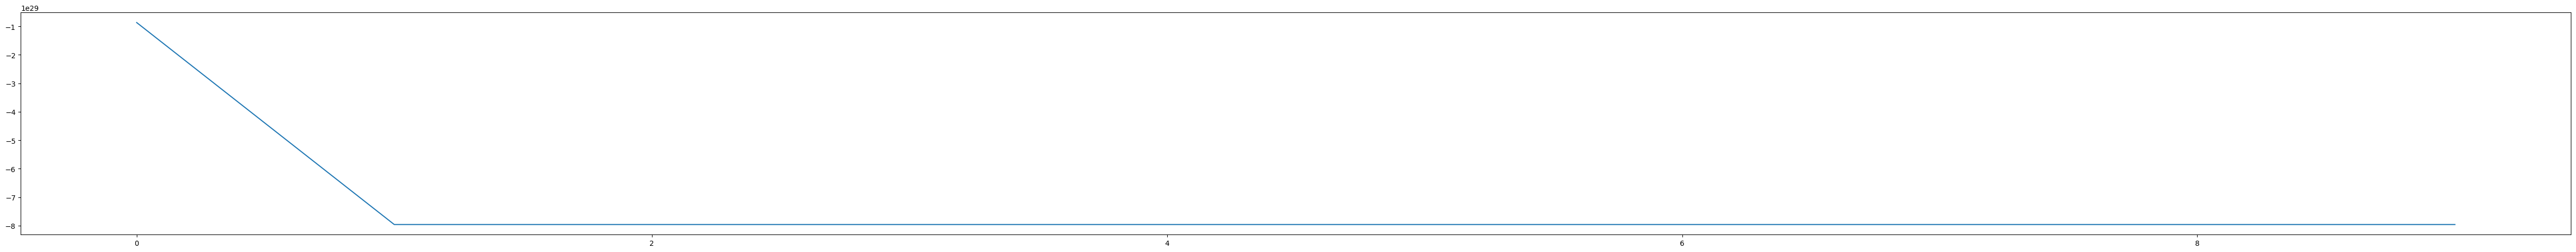

In [315]:
# test
Energy = []

iter_cnt = 10

test_images_idx = [5, 15]

coef_TR = 0.2

for img_idx in test_images_idx:
    I = np.copy(images[img_idx])
    show_image(image=I.reshape(img_side, img_side))

    Energy = []

    for iter_idx in range(iter_cnt):
        O = np.dot(W, I)

        O **= n

        print(f'{O.max()=} {O.min()=} {np.mean(O)=} {np.median(O)=} {(O > 0).sum()=}')

        E = np.sum(O)
        Energy.append(E)

        O /= np.max(np.abs(O)) + prec
        
        # threshold
        O[O <= TR * coef_TR] = -1
        O[O > TR * coef_TR] = 1

        print(f'{(O > 0).sum()=}')

        # recur
        I = np.copy(O)

        show_image(image=O.reshape(img_side, img_side))
    
    simple_plot(T=Energy)